# TensorFlow

TensorFlow ist ein Open-Source-Framework von Google, das für maschinelles Lernen und künstliche Intelligenz verwendet wird. Es bietet Werkzeuge und Bibliotheken, um neuronale Netze effizient zu erstellen, zu trainieren und in Produktionsumgebungen einzusetzen. TensorFlow arbeitet hauptsächlich mit Datenflüssen (engl. "tensors"), wo Daten durch eine Reihe von Berechnungen (engl. "graph") fließen.

### Wichtige Punkte:
1. **Tensors**: TensorFlow verarbeitet Daten in Form von Tensors (mehrdimensionale Arrays).
2. **Graphen**: Es erstellt einen Berechnungsgraphen, der beschreibt, wie Daten von Operationen durchlaufen werden.
3. **Kompatibilität**: Unterstützt CPU, GPU und TPU für skalierbare Berechnungen.
4. **Vielseitigkeit**: Wird für viele Aufgaben des maschinellen Lernens verwendet, wie Klassifikation, Vorhersage, Bildverarbeitung, Textanalyse etc.

Hier ist ein Beispiel, das zeigt, wie ein einfaches neuronales Netz in TensorFlow erstellt wird:
- **Layers**: Das Modell hat drei Schichten (einschließlich einer Ausgabeschicht mit 10 Klassen).
- **Kompilierung**: Wir verwenden den Adam-Optimizer und die `sparse_categorical_crossentropy`-Loss-Funktion, die für Multi-Klassen-Klassifikationsprobleme geeignet ist.
- **Training**: Dummy-Daten werden für fünf Epochen trainiert.

TensorFlow ist vielseitig und flexibel, sodass du sowohl einfache als auch sehr komplexe Modelle, wie Convolutional Neural Networks (CNNs) und Recurrent Neural Networks (RNNs), erstellen kannst.

# Test

[*********************100%***********************]  1 of 1 completed

Anzahl der Datenpunkte: 3674
Erste 20 Einträge der Bitcoin-Preise gespeichert in 'bitcoin_prices_sample_lstm.csv'.
Erste 5 Einträge des vollständigen Datensatzes:
        Date       Price
0 2014-09-17  457.334015
1 2014-09-18  424.440002
2 2014-09-19  394.795990
3 2014-09-20  408.903992
4 2014-09-21  398.821014


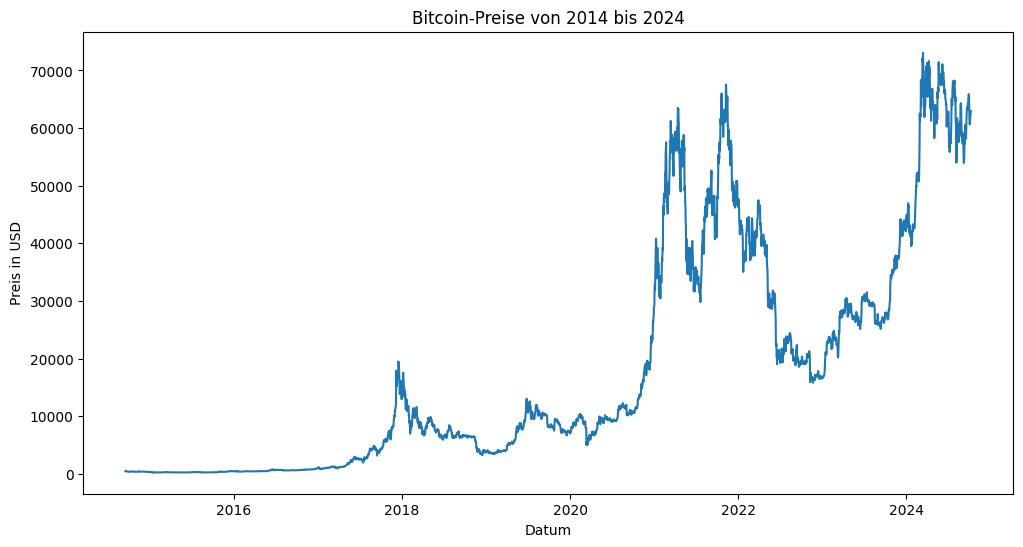

C:\Users\jbous\Desktop\Data-Analyst\Kurs_VE\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0168 - val_loss: 0.0013
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.2074e-04 - val_loss: 0.0019
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.9015e-04 - val_loss: 0.0012
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.0609e-04 - val_loss: 0.0011
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.3591e-04 - val_loss: 0.0010
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.8821e-04 - val_loss: 0.0011
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.2980e-04 - val_loss: 8.7789e-04
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.5765e-04 - val_loss: 0.0017
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.2020e-04 - val_loss: 9.4619e-04
Epoch 10/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.5682e-04 - val_loss: 6.1325e-04
Epoch 11/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.9488e-04 - val_loss: 8.1314e-04
Epoch 1

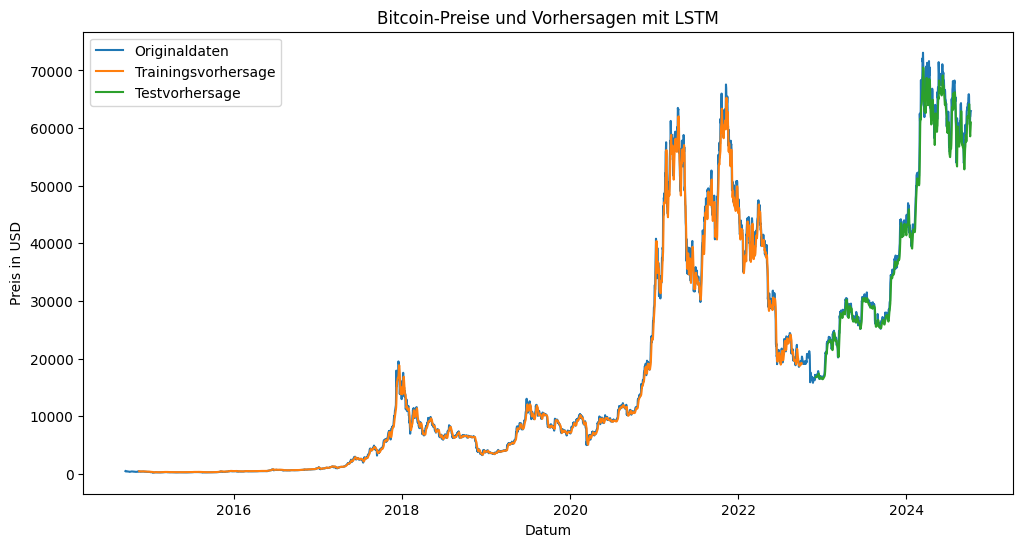

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Vorhergesagter Bitcoin-Preis nach 60 Tagen: 61446.14 USD


In [1]:
# Bibliotheken importieren
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Schritt 1: Definiere das Start- und Enddatum
start_date = datetime(2014, 9, 17)  # Bitcoin-Daten sind seit 2014 auf Yahoo Finance verfügbar
end_date = datetime(2024, 12, 31)

# Schritt 2: Daten abrufen mit yfinance
try:
    bitcoin_data = yf.download('BTC-USD', start=start_date, end=end_date)
except Exception as e:
    print(f"Fehler beim Abrufen der Daten: {e}")
    exit()

# Überprüfen, ob Daten abgerufen wurden
if bitcoin_data.empty:
    print("Keine Daten abgerufen. Überprüfe das Ticker-Symbol und das Datum.")
    exit()

# Die 'Close'-Preise extrahieren
bitcoin_prices = bitcoin_data.reset_index()[['Date', 'Close']]
bitcoin_prices.rename(columns={'Close': 'Price'}, inplace=True)

# Überprüfen der Anzahl der Datenpunkte
num_data_points = len(bitcoin_prices)
print(f"Anzahl der Datenpunkte: {num_data_points}")

if num_data_points < 2:
    print("Nicht genügend Datenpunkte für die Regression.")
    exit()

# Optional: Die ersten 20 Einträge auswählen und speichern
bitcoin_prices_sample = bitcoin_prices.head(20)
bitcoin_prices_sample.to_csv('bitcoin_prices_sample_lstm.csv', index=False)
print("Erste 20 Einträge der Bitcoin-Preise gespeichert in 'bitcoin_prices_sample_lstm.csv'.")

# Optional: Anzeige der ersten 5 Einträge zur Überprüfung
print("Erste 5 Einträge des vollständigen Datensatzes:")
print(bitcoin_prices.head())

# Schritt 3: Explorative Datenanalyse (EDA)
# Beispiel: Visualisierung der Bitcoin-Preise über die Zeit
plt.figure(figsize=(12,6))
sns.lineplot(data=bitcoin_prices, x='Date', y='Price')
plt.title('Bitcoin-Preise von 2014 bis 2024')
plt.xlabel('Datum')
plt.ylabel('Preis in USD')
plt.show()

# Schritt 4: Datenvorbereitung für LSTM
# Sortiere die Daten nach Datum
bitcoin_prices = bitcoin_prices.sort_values('Date')

# Wandle die Preise in ein numpy Array um
data = bitcoin_prices['Price'].values.reshape(-1, 1)

# Skaliere die Daten zwischen 0 und 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Definiere die Anzahl der Tage, die das Modell verwenden soll, um den nächsten Tag vorherzusagen
look_back = 60

# Funktion zur Erstellung der Datenstrukturen
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Erstelle Trainings- und Testdatensätze
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

# Erstelle die Datenstrukturen
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape der Eingabedaten, um sie in das LSTM-Modell einzuspeisen
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Schritt 5: LSTM-Modell erstellen
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Kompiliere das Modell
model.compile(optimizer='adam', loss='mean_squared_error')

# Schritt 6: Modell trainieren
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Schritt 7: Vorhersagen treffen
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse Transformation der Skalierung
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

# Schritt 8: Modellbewertung
mse = mean_squared_error(y_test_inv[0], test_predict[:,0])
print(f"Mean Squared Error (MSE) auf Testdaten: {mse:.2f}")

# Schritt 9: Visualisierung der Ergebnisse
# Verschiebe die Trainingsvorhersage zurück in die Zeitreihe
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

# Verschiebe die Testvorhersage zurück in die Zeitreihe
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2):len(data), :] = test_predict

# Zeichne das Original und die Vorhersagen
plt.figure(figsize=(12,6))
plt.plot(bitcoin_prices['Date'], scaler.inverse_transform(scaled_data), label='Originaldaten')
plt.plot(bitcoin_prices['Date'], train_predict_plot, label='Trainingsvorhersage')
plt.plot(bitcoin_prices['Date'], test_predict_plot, label='Testvorhersage')
plt.title('Bitcoin-Preise und Vorhersagen mit LSTM')
plt.xlabel('Datum')
plt.ylabel('Preis in USD')
plt.legend()
plt.show()

# Schritt 10: Vorhersage für zukünftige Preise (z.B. nach 4000 Tagen)
# Hinweis: Eine Vorhersage nach 4000 Tagen (ca. 11 Jahre) ist extrem herausfordernd
# und erfordert spezielle Techniken. Hier ist ein einfaches Beispiel für eine Kurzfristvorhersage.

# Wähle die letzten 'look_back' Tage aus den Daten
last_days = scaled_data[-look_back:]
last_days = last_days.reshape((1, look_back, 1))

# Vorhersage treffen
future_price_scaled = model.predict(last_days)

# Inverse Transformation
future_price = scaler.inverse_transform(future_price_scaled)
print(f"Vorhergesagter Bitcoin-Preis nach {look_back} Tagen: {future_price[0][0]:.2f} USD")

# Für eine längere Vorhersage müssten wir das Modell iterativ nutzen,
# indem wir die vorhergesagten Werte wieder als Eingabe verwenden.


# Erklärung

Was sieht man da eigentlich genau?

### Schritt 1: Bibliotheken importieren

Wir benötigen eine Reihe von Bibliotheken, um die Preisdaten von Bitcoin abzurufen, sie zu analysieren und unser Modell zu trainieren.

```python
import yfinance as yf  # Für das Abrufen der Bitcoin-Daten
import pandas as pd  # Datenverarbeitung
import numpy as np  # Numerische Berechnungen
import matplotlib.pyplot as plt  # Visualisierung
import seaborn as sns  # Erweiterte Visualisierung
from datetime import datetime  # Arbeiten mit Datumsangaben
from sklearn.preprocessing import MinMaxScaler  # Skalierung der Daten
from sklearn.metrics import mean_squared_error  # Modellbewertung
import tensorflow as tf  # TensorFlow für das LSTM-Modell
from tensorflow.keras.models import Sequential  # Zum Erstellen des neuronalen Netzes
from tensorflow.keras.layers import Dense, LSTM  # LSTM- und Dense-Schichten
```

Siehe auch: [LSTM](../../Zentral_Ordner/Fachwörter/LSTM.ipynb)

### Schritt 2: Datenabruf und Überprüfung

Wir verwenden `yfinance`, um historische Bitcoin-Preisdaten von Yahoo Finance abzurufen.

```python
# Definiere das Start- und Enddatum
start_date = datetime(2014, 9, 17)
end_date = datetime(2024, 12, 31)

# Abrufen der Daten von Yahoo Finance
bitcoin_data = yf.download('BTC-USD', start=start_date, end=end_date)

# Überprüfen, ob Daten abgerufen wurden
if bitcoin_data.empty:
    print("Keine Daten abgerufen.")
    exit()

# 'Close'-Preise extrahieren und Datensatz umbenennen
bitcoin_prices = bitcoin_data.reset_index()[['Date', 'Close']]
bitcoin_prices.rename(columns={'Close': 'Price'}, inplace=True)
```

### Schritt 3: Explorative Datenanalyse (EDA)

Zunächst visualisieren wir die historischen Bitcoin-Preise, um einen ersten Eindruck von den Daten zu erhalten.

```python
plt.figure(figsize=(12,6))
sns.lineplot(data=bitcoin_prices, x='Date', y='Price')
plt.title('Bitcoin-Preise von 2014 bis 2024')
plt.xlabel('Datum')
plt.ylabel('Preis in USD')
plt.show()
```

Diese Visualisierung gibt uns ein klares Bild davon, wie sich die Bitcoin-Preise im Zeitverlauf verändert haben.

### Schritt 4: Datenvorbereitung für LSTM

- Wir sortieren die Daten nach Datum und skalieren die Preise, da neuronale Netze am besten mit skalierten Daten funktionieren (z.B. zwischen 0 und 1).
- Außerdem erstellen wir eine Funktion, die aus den letzten `look_back` Tagen die Vorhersage für den nächsten Tag erzeugt.

```python
# Sortiere die Daten nach Datum
bitcoin_prices = bitcoin_prices.sort_values('Date')

# Wandle die Preise in ein numpy Array um
data = bitcoin_prices['Price'].values.reshape(-1, 1)

# Skaliere die Daten zwischen 0 und 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Funktion zur Erstellung der Eingabe- und Ausgabedatenstrukturen
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Teile die Daten in Training (80%) und Test (20%)
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[0:train_size], scaled_data[train_size:]

# Erstelle die Datenstrukturen
look_back = 60  # Anzahl der Tage, die zur Vorhersage genutzt werden
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Formatiere die Daten für das LSTM-Netzwerk
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
```

### Schritt 5: Erstellen des LSTM-Modells

Das Modell besteht aus mehreren Schichten. Zwei LSTM-Schichten verarbeiten die Zeitseriendaten und eine Dense-Schicht gibt die Vorhersage aus.

```python
# LSTM-Modell erstellen
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))  # Eine Ausgabeneinheit für die Preisvorhersage

# Kompiliere das Modell
model.compile(optimizer='adam', loss='mean_squared_error')
```

### Schritt 6: Training des Modells

Wir trainieren das Modell für 20 Epochen und verwenden 32 Datenpunkte pro Batch.

```python
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
```

### Schritt 7: Vorhersagen und Auswertung

Nach dem Training nutzen wir das Modell, um sowohl die Trainings- als auch die Testdaten vorherzusagen. Anschließend transformieren wir die Werte zurück in den ursprünglichen Wertebereich.

```python
# Vorhersagen treffen
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Rücktransformation der Skalierung
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

# Modellbewertung
mse = mean_squared_error(y_test_inv[0], test_predict[:, 0])
print(f"Mean Squared Error (MSE) auf Testdaten: {mse:.2f}")
```

### Schritt 8: Visualisierung der Ergebnisse

Wir vergleichen die tatsächlichen Bitcoin-Preise mit den Vorhersagen für Trainings- und Testdaten.

```python
# Visualisierung
plt.figure(figsize=(12,6))
plt.plot(bitcoin_prices['Date'], scaler.inverse_transform(scaled_data), label='Originaldaten')
plt.plot(bitcoin_prices['Date'][:len(train_predict)], train_predict, label='Trainingsvorhersage')
plt.plot(bitcoin_prices['Date'][len(train_predict)+(look_back*2):], test_predict, label='Testvorhersage')
plt.title('Bitcoin-Preise und Vorhersagen mit LSTM')
plt.xlabel('Datum')
plt.ylabel('Preis in USD')
plt.legend()
plt.show()
```

### Schritt 9: Vorhersage für zukünftige Preise

Hier führen wir eine Kurzfristvorhersage durch, indem wir die letzten `look_back` Tage verwenden, um den nächsten Tag vorherzusagen.

```python
# Vorhersage für den nächsten Tag
last_days = scaled_data[-look_back:]
last_days = last_days.reshape((1, look_back, 1))

future_price_scaled = model.predict(last_days)
future_price = scaler.inverse_transform(future_price_scaled)
print(f"Vorhergesagter Bitcoin-Preis nach {look_back} Tagen: {future_price[0][0]:.2f} USD")
```

### Erklärung der Schritte:

1. **Datensammlung**: Wir haben die historischen Daten von Bitcoin mithilfe von `yfinance` abgerufen.
2. **Datenvorbereitung**: Die Preise wurden skaliert, um das Training des neuronalen Netzes zu erleichtern.
3. **LSTM-Modell**: Das Modell verwendet LSTM-Schichten, die speziell für sequenzielle Daten wie Zeitreihen entwickelt wurden.
4. **Training**: Das Modell wurde mit historischen Daten trainiert, um Muster zu lernen.
5. **Vorhersagen**: Wir haben das Modell genutzt, um sowohl auf Testdaten als auch auf zukünftige Daten Vorhersagen zu treffen.

Dieses Vorgehen ist eine Grundlage, auf der du weitere Verbesserungen wie Hyperparameter-Tuning oder längere Vorhersagen aufbauen kannst.